# RNA-Seq dataset

### Description 

The RNA-Seq dataset includes bulk gene expression profiles measured in human peripheral blood mononuclear cells (PBMC) cells, sampled at each visit to the clinical testing center.

### Introduction 
<!-- just for RNA-Seq: shortened from the original introduction in the data doc -->
RNA sequencing (RNA-Seq) is a powerful high-throughput technique used to analyze the transcriptome, providing a snapshot of RNA presence and quantity in a biological sample at a given moment. Our bulk approach sequences RNA from a mixed population of cells, giving a cumulative overview of gene expression across the sample. It's widely used for understanding complex biological processes and disease mechanisms.

This RNA-Seq dataset focuses on gene expression profiles in human peripheral blood mononuclear cells (PBMC), collected during patient visits to a clinical testing center. The aim is to uncover the gene expression dynamics in PBMCs under various clinical conditions. PBMCs, which include lymphocytes and monocytes, play a key role in the immune response. The gene expression patterns in these cells can provide valuable insights into immune system activities and pathophysiological states.

The dataset was generated using 3’-tagged bulk RNA sequencing technology, capturing a broad spectrum of gene expression in PBMCs from diverse clinical samples. This protocol was adapted from the mcSCRB-seq protocol  ([Bagnoli et al.](https://www.nature.com/articles/s41467-018-05347-6)). This method incorporates unique molecular identifiers (UMIs), sample multiplexing (Figure 1). UMIs are crucial for accurately quantifying transcript abundance, as they enable the differentiation of PCR duplicates from unique mRNA molecules. Pool barcodes facilitate multiplexing of several samples in a single sequencing run, enhancing throughput efficiency. Sample barcodes are used to track individual samples, ensuring precise sample identification.

The dataset is instrumental for research in immunology and systemic diseases, offering a unique perspective on how PBMC gene expression varies in different clinical scenarios. It serves as a critical resource for understanding immune responses and developing therapeutic strategies.

### Measurement protocol 
<!-- long measurment protocol for the data browser -->
#### Sample Collection and Storage
Peripheral blood mononuclear cells (PBMCs) were collected from human participants following established standard operating procedures. Blood samples were drawn at the Clinical Testing Center (CTC), with three tubes per participant (Complete Blood Count (CBC), serum, and PBMC isolation). The PBMC samples were processed within 2 hours of collection, where centrifugation was performed to separate the mononuclear layer.

After isolation, PBMCs were aliquoted into three tubes per sample. For the purpose of RNA sequencing, one aliquot was stored at -80°C, preserving RNA integrity for downstream analysis. The viability and concentration of PBMCs were assessed using an automated cell counter, ensuring a high quality of the isolated cells for downstream processing.

#### RNA Extraction and Library Preparation
RNA was extracted from the PBMC samples using a standard protocol. During reverse transcription, Unique Molecular Identifiers (UMIs), sample barcodes, PCR primers, and ERCC spike-ins were added to each sample. The ERCC spike-ins serve as external controls for quantifying and normalizing gene expression data, ensuring accurate transcript measurements.

After reverse transcription, the cDNA was subject to initial amplification to increase the quantity of material available for library preparation. A cutting enzyme (TDE1, or Nextera transposase prior to May 2023) was then introduced to fragment the cDNA and add sequencing adaptors through tagmentation.

Following fragmentation, samples were pooled, and a final round of PCR amplification was performed to complete the library, preparing it for sequencing.

#### Sequencing
The prepared RNA libraries were sequenced on the Illumina NovaSeq platform with an average read depth of 5 million reads per sample. Read 1 (R1) is 20 base pairs (bp) long (after removing the sample barcode) and contains the UMI and poly-T tail. Read 2 (R2) is 66bp long and contains the cDNA and possibly poly-A tail. PhiX control libraries were spiked into the sequencing runs to enhance sequence diversity. The sequencing generated high-quality 3' RNA-seq data, suitable for downstream bioinformatic analysis.

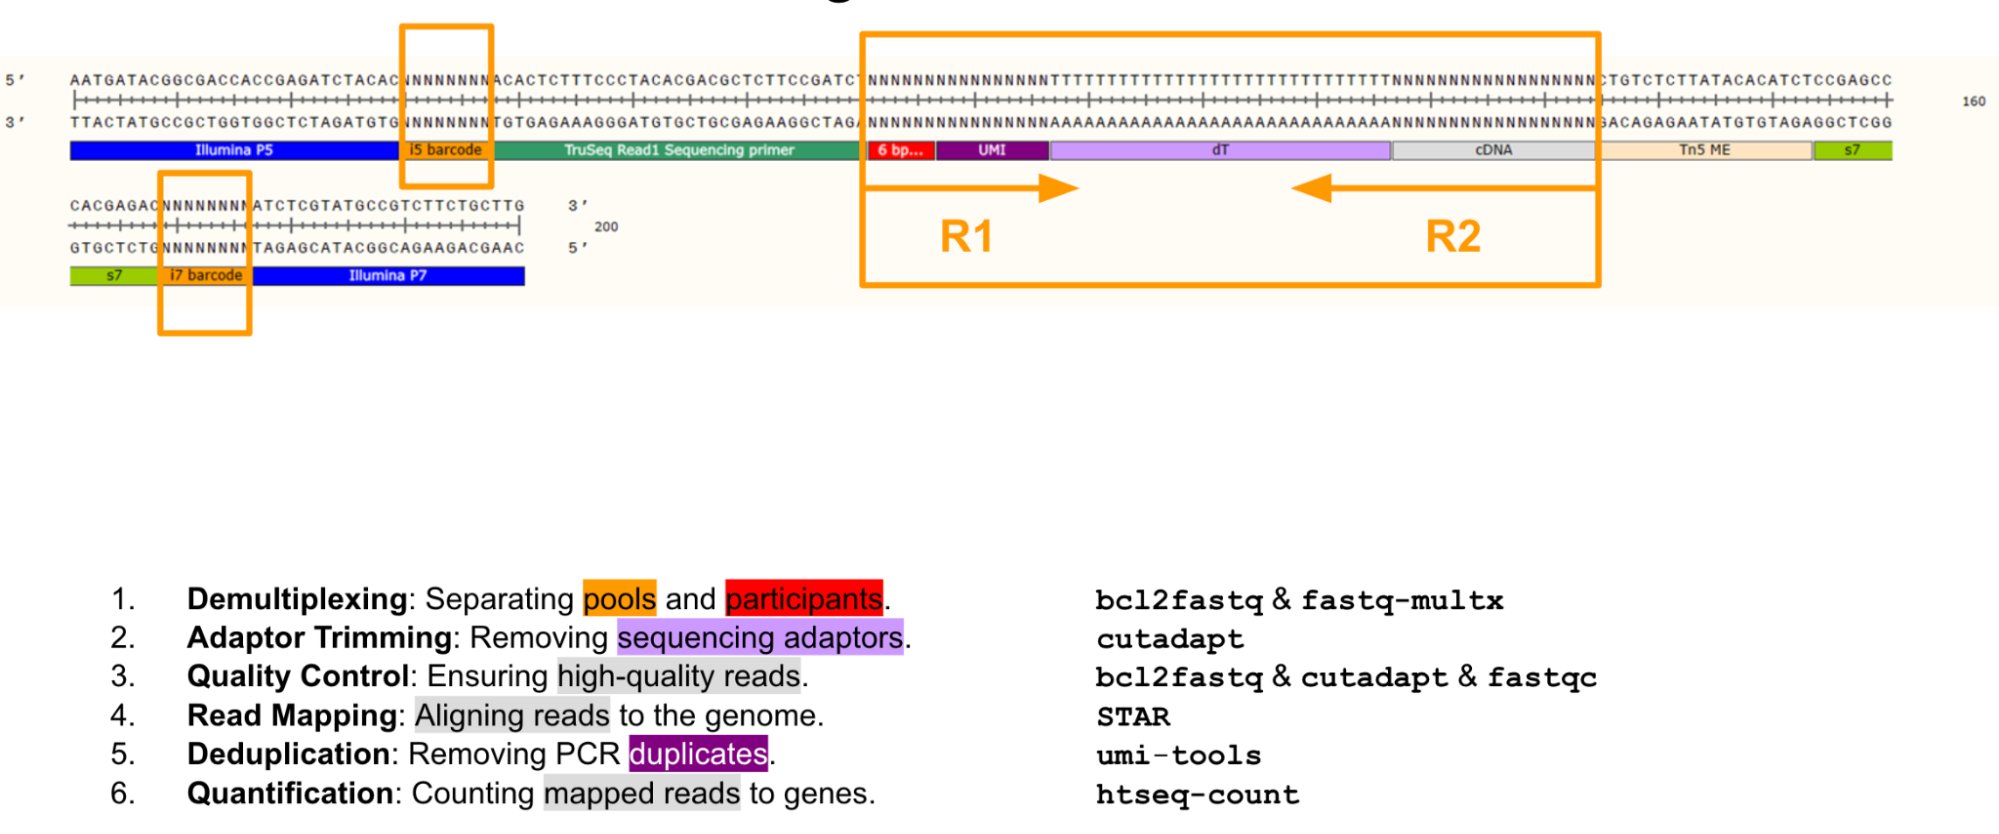

Figure 1: library structure

### Data availability 
<!-- for the example notebooks -->
- All tabular information is stored in a main parquet file: `rna_seq.parquet`
- Read counts are stored in long-format parquet files per batch
- Each sequencing batch includes metadata parquet, JSON and HTML files

```{mermaid}
flowchart LR;

S[sequencing] -->|bcl2fastq<br>fastq-multx| raw(raw FASTQ) -->|umi-tools<br>cutadapt| trimmed(trimmed FASTQ) -->|STAR| aligned(aligned BAM) -->|umi-tools| deduplicated(deduplicated BAM) -->|htseq| counts(counts)

raw --> metadata(metadata)
trimmed --> metadata
aligned --> metadata
deduplicated --> metadata
counts --> metadata
```

### Relevant links

* [Pheno Knowledgebase](https://knowledgebase.pheno.ai/datasets/024-rna_seq.html)
* [Pheno Data Browser](https://pheno-demo-app.vercel.app/folder/24)


In [1]:
#| echo: false
import pandas as pd
pd.set_option("display.max_rows", 500)

In [2]:
from pheno_utils import PhenoLoader

In [3]:
pl = PhenoLoader('rna_seq')
pl

PhenoLoader for rna_seq with
103 fields
2 tables: ['rna_seq', 'age_sex']

# Data dictionary

In [4]:
pl.dict

,field_string,description_string,folder_id,feature_set,field_type,strata,data_coding,array,pandas_dtype,bulk_file_extension,...,transformation,list_of_tags,stability,sexed,debut,completed,min_plausible_value,max_plausible_value,dependency,parent_dataframe
tabular_field_name,,,,,,,,,,,,,,,,,,,,,
collection_timestamp,Collection timestamp,Time sample was given,24.0,rna_seq,Datetime,Collection time,NaN,Multiple,"datetime64[ns, Asia/Jerusalem]",NaN,...,NaN,"RNA-seq,transcriptomics,gene expression",Accruing,Both sexes,2021-02-28,NaN,NaN,NaN,NaN,NaN
collection_date,Collection date,Date sample was given,24.0,rna_seq,Date,Collection time,NaN,Multiple,datetime64[ns],NaN,...,NaN,"RNA-seq,transcriptomics,gene expression",Accruing,Both sexes,2021-02-28,NaN,NaN,NaN,NaN,NaN
timezone,Timezone,Timezone of the collection timestamp,24.0,rna_seq,Categorical (single),Collection time,001_03,Multiple,category,NaN,...,NaN,"RNA-seq,transcriptomics,gene expression",Accruing,Both sexes,2021-02-28,NaN,NaN,NaN,NaN,NaN
batch,Batch,Sequencing batch of the sample,24.0,rna_seq,Categorical (single),Collection time,NaN,Multiple,category,NaN,...,NaN,"RNA-seq,transcriptomics,gene expression",Accruing,Both sexes,2021-02-28,NaN,NaN,NaN,NaN,NaN
pool,Pool,Pool number within the batch,24.0,rna_seq,Integer,Auxiliary,NaN,Multiple,Int64,NaN,...,NaN,"RNA-seq,transcriptomics,gene expression",Accruing,Both sexes,2021-02-28,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
bcl2fastq__total_pools,Bcl2fastq: total pools,Bcl2fastq: total pools,NaN,NaN,columns,NaN,NaN,NaN,float,NaN,...,NaN,"RNA-seq,transcriptomics,gene expression",NaN,NaN,NaN,NaN,NaN,NaN,NaN,batch_metadata_parquet
bcl2fastq__undetermined,Bcl2fastq: undetermined,Bcl2fastq: undetermined,NaN,NaN,columns,NaN,NaN,NaN,float,NaN,...,NaN,"RNA-seq,transcriptomics,gene expression",NaN,NaN,NaN,NaN,NaN,NaN,NaN,batch_metadata_parquet
bcl2fastq__undetermined_percent,Bcl2fastq: undetermined percent,Bcl2fastq: undetermined percent,NaN,NaN,columns,NaN,NaN,NaN,float,NaN,...,NaN,"RNA-seq,transcriptomics,gene expression",NaN,NaN,NaN,NaN,NaN,NaN,NaN,batch_metadata_parquet


# Plot histogram and ecdf for htseq_count__assigned__unique at baseline visit


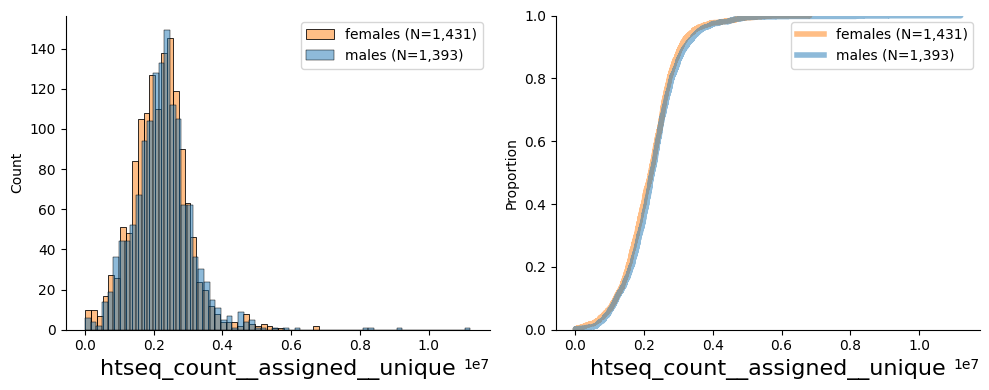

,count,mean,std,min,25%,50%,75%,max
htseq_count__assigned__unique,2824.0,2223589.202904,857712.561714,1463.0,1707855.25,2218835.0,2660384.5,11209544.0


In [5]:
from pheno_utils.basic_plots import hist_ecdf_plots

col = "htseq_count__assigned__unique"
df = pl[[col] + ["age", "sex", "collection_date"]].loc[:,:,"00_00_visit",0,:]

# plot histogram and ecdf
hist_ecdf_plots(df.dropna(subset=[col,"sex", "age"]), col, gender_col="sex")

# stats
display(df[col].describe().to_frame().T)